
# Dataset Overview

## Source and Composition

This project utilizes a dataset sourced from Kaggle, titled "AI Vs Human Text", which comprises 500K AI-generated and human-written essays.

## Characteristics

- **Size**: The dataset is approximately 1.11 GB, indicating a substantial volume of text data suitable for deep learning applications.
- **Entries**: It contains around 487235 essays, split almost evenly between AI-generated and human-written texts.
- **Content Variety**: The essays cover a wide range of topics, styles, and complexities, providing a rich corpus for the model to learn from.
- **Format**: Each entry in the dataset is labeled accordingly in "generated" column, with '1' indicating AI-generated text and '0' representing human-written text. This labeling simplifies the process of training supervised learning models.

## Kaggle Link

For more details or to access the dataset, visit the https://www.kaggle.com/datasets/shanegerami/ai-vs-human-text/data 

## Pipeline Structure

Our machine learning pipeline comprises the following stages:
1. Data Preprocessing
2. Data Loading and Batching/Chunking
3. Model Training
4. Evaluation and Prediction

<a href="https://imgur.com/esJ7qpW"><img src="https://i.imgur.com/esJ7qpW.png" title="source: imgur.com" /></a>

# Data Preprocessing 

Before training, the dataset was downsized to 10% of the dataset and preprocessed in batches/chunks to ensure it was in a suitable format for BERT. This involved:
- **Cleaning Text**: Lowercasing, removing punctuation, numbers, and stopwords to reduce noise.
- **Tokenization and Encoding**: Using BERT's tokenizer to convert text into tokens and encode them as integers.

Taking into account the size of the dataset a generator function was utilized to load and preprocess data to significantly enhance the efficiency.

# Data Loading and Batching/Chunking

Our approach involves the strategic loading of data and its division into manageable 'chunks' or batches, which has multiple benefits:
- **Memory Management**: By batching the data, we prevent memory overflow, making it feasible to work with datasets larger than the available memory.
- **Parallel Processing**: Batching enables the model to train in parallel, significantly speeding up the learning process.
- **Gradient Updates**: More frequent updates with smaller batches can lead to faster convergence.

## Chunking with Generators

We employ generators to load our data in chunks, a technique that allows us to:
- **Streamline Processing**: Load and process data on-the-fly, which is especially beneficial for datasets that are too large to fit into memory.
- **Increase Flexibility**: Adjust the size of the chunks dynamically based on the performance and memory constraints.
Using these techniques, our model can efficiently handle large volumes of data, learning from them incrementally and effectively.

# Model Training

In this project, we leverage **Transfer Learning** by utilizing a **pre-trained** BERT model. This approach allows us to benefit from BERT's extensive knowledge of language, acquired from training on vast amounts of text data.

## Training Environment

The model training was conducted on a **Kaggle Notebook**, leveraging the platform's robust computational resources.

### GPU Acceleration

For this project, we utilized **NVIDIA Tesla T4 GPUs**, with two instances allocated as accelerators for our training session. The use of dual T4 GPUs allowed for faster model training times and more efficient processing of the large dataset.

## Applying Transfer Learning

We apply transfer learning to our text classification task as follows:

1. **Load the Pre-Trained BERT Model**: We use `TFBertForSequenceClassification` from the Transformers library, which is pre-trained on a large corpus of text data.
2. **Fine-Tuning**: Although BERT is already trained, we fine-tune it on our specific dataset. This involves making minor adjustments to the model's weights such that it can better perform our classification task. Fine-tuning is a crucial step in transfer learning, allowing the pre-trained model to adapt to the nuances of our data.
3. **Evaluation**: After fine-tuning, we evaluate the model's performance on our validation set to ensure that it has effectively learned from our specific dataset.

## Training Process

Training involves feeding batches of preprocessed text to the model and optimizing the weights. We monitor validation loss to prevent overfitting, employing an EarlyStopping callback for this purpose.

The training process is visualized using TensorBoard, providing insights into metrics such as accuracy and loss over time.

# Evaluation and Prediction

After training, we evaluate the model's performance on unseen data. This step is crucial for understanding the model's generalization ability.

## Making Predictions

We use the trained model to predict the category of new texts, demonstrating its practical application. The predictions help us gauge the model's accuracy and reliability in distinguishing between AI-generated and human-written text.

The following text was used for predictions:

#Text1 from the Internet written by human retrieved from https://www.cbc.ca/news/canada/newfoundland-labrador/snow-wind-rain-feb-04-1.7104491 example_text_1 ="Most of the island is under a special weather statement with a prolonged period of snow in the forecast for much of western and central Newfoundland, along the northeast coast and onto the northern Avalon Peninsula."

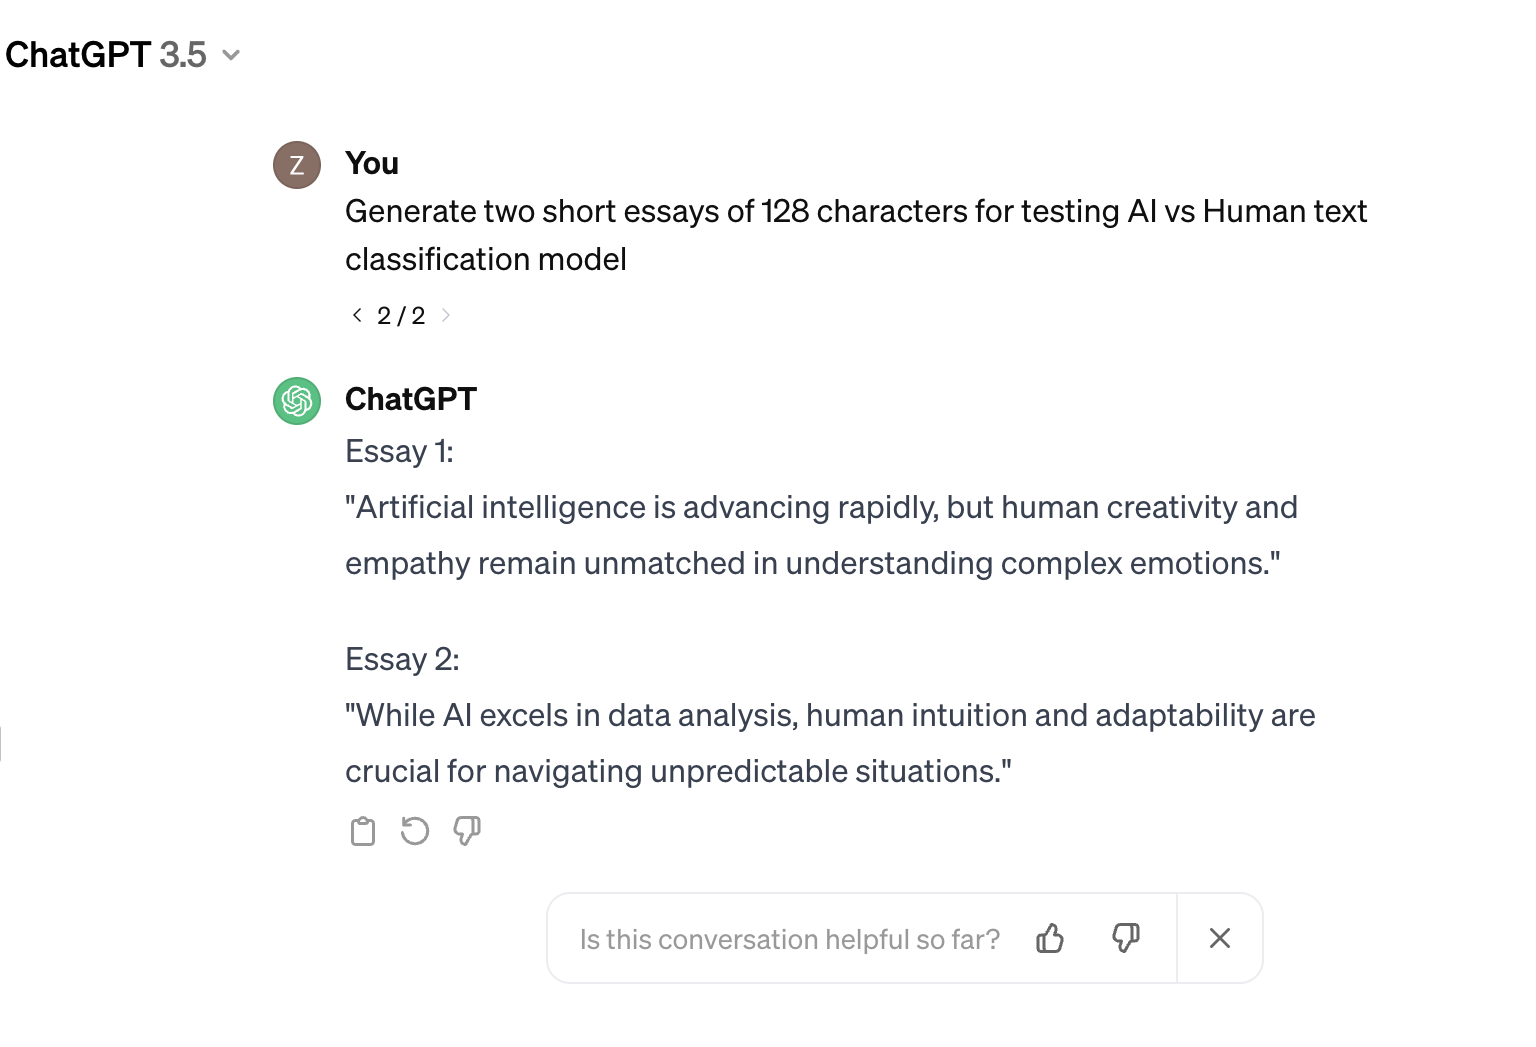

#Text2 generated by ChatGPT: example_text_2 = "Artificial intelligence is advancing rapidly, but human creativity and empathy remain unmatched in understanding complex emotions." 

#Text3 generated by ChatGPT: example_text_3 = "While AI excels in data analysis, human intuition and adaptability are crucial for navigating unpredictable situations."

#Text4 from the Internet written by human retrieved from https://michiganlawreview.org/journal/a-mystifying-and-distorting-factor-the-electoral-college-and-american-democracy/ example_text_4 ="As the 2020 presidential election made clear, the Electoral College is a profoundly dangerous institution. American constitutional democracy survived that election and its aftermath, emerging battered and bruised but still standing."

In [31]:
# Installing and Importing necessary libraries
!pip install tensorflow transformers pandas tqdm scikit-learn

# Standard library imports for built-in functionality
import datetime
import os
import re
import string
import time

# Data handling libraries to work with dataframes and arrays
import numpy as np
import pandas as pd

# Data visualization libraries for creating charts and plots
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning and NLP libraries for model building and text processing
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.optimizers import Adam
from transformers import BertTokenizer, TFBertForSequenceClassification

# Natural Language Toolkit for text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensuring required NLTK components are available
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
# Creating a log directory for TensorBoard with a timestamp to differentiate runs and Tensorboard callback
log_dir = "/kaggle/working/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Exploratory Data Analysis 

In [33]:
# Loading the dataset
dataset_path = '/kaggle/input/500k-essays/AI_Human.csv'  #the dataset was uploaded manually to Kaggle notebook as input
df = pd.read_csv(dataset_path)

In [34]:
# Displaying the dataset to make sure that the dataset can be read successfully
df

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0
...,...,...
487230,Tie Face on Mars is really just a big misunder...,0.0
487231,The whole purpose of democracy is to create a ...,0.0
487232,I firmly believe that governments worldwide sh...,1.0
487233,I DFN't agree with this decision because a LFT...,0.0


In [35]:
# The 'generated' column shows a binary classification with 305,797 entries as 0.0 and 181,438 as 1.0,
# indicating this dataset is potentially used for binary outcome classification task.
df['generated'].value_counts()

generated
0.0    305797
1.0    181438
Name: count, dtype: int64

In [36]:
# The dataset contains 487,235 rows and 2 columns, indicating a substantial volume for analysis or modeling.
df.shape

(487235, 2)

In [37]:
# The dataframe consists of two columns: 'text' for narratives and 'generated' for binary classification outcomes.
df.columns

Index(['text', 'generated'], dtype='object')

In [38]:
# The dataset contains no duplicate rows, indicating clean and unique data entries for analysis.
df.duplicated().sum()

0

In [39]:
# There are no missing values in both 'text' and 'generated' columns, showcasing a dataset ready for processing.
df.isnull().sum()

text         0
generated    0
dtype: int64

In [40]:
# The DataFrame has 487,235 entries with no nulls across 2 columns: 'text' (object type) and 'generated' (float64 type),
# indicating a mix of textual data and numerical scores with efficient memory usage of 7.4 MB.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487235 entries, 0 to 487234
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   text       487235 non-null  object 
 1   generated  487235 non-null  float64
dtypes: float64(1), object(1)
memory usage: 7.4+ MB


In [41]:
class DataPlotter:
    """Class for plotting data distributions within a pandas DataFrame."""

    def __init__(self, dataframe):
        """
        Initializes the DataPlotter with a specific pandas DataFrame.

        Args:
            dataframe (pd.DataFrame): The DataFrame containing the data to plot.
        """
        self.dataframe = dataframe

    def plot_column_distribution(self, column_name, title, x_label, y_label):
        """
        Plots the distribution of a specified column in the DataFrame.

        Args:
            column_name (str): The name of the column to plot.
            title (str): The title of the plot.
            x_label (str): The label for the x-axis.
            y_label (str): The label for the y-axis.
        """
        plt.figure(figsize=(6, 4))
        sns.countplot(x=column_name, data=self.dataframe)
        plt.title(title)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.show()

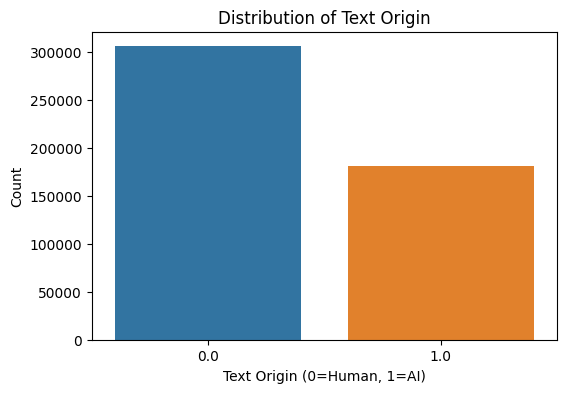

In [42]:
plotter = DataPlotter(df)
plotter.plot_column_distribution('generated', 'Distribution of Text Origin', 'Text Origin (0=Human, 1=AI)', 'Count')

In [43]:
df['text_length'] = df['text'].apply(len)
human_lengths = df[df['generated'] == 0]['text_length']
ai_lengths = df[df['generated'] == 1]['text_length']

In [44]:
class DataVisualizer:
    """Class for visualizing data distributions and comparisons."""

    def __init__(self, data, human_lengths, ai_lengths):
        """
        Initializes the DataVisualizer with the dataset and length comparisons.

        Args:
            data (pd.DataFrame): The dataset containing the 'text_length' and 'generated' columns.
            human_lengths (list or pd.Series): Lengths associated with human-generated texts.
            ai_lengths (list or pd.Series): Lengths associated with AI-generated texts.
        """
        self.data = data
        self.human_lengths = human_lengths
        self.ai_lengths = ai_lengths

    def plot_distributions(self):
        """Creates and displays histograms, boxen plots, and density plots."""
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

        # Histogram of lengths
        sns.histplot(self.human_lengths, kde=True, color='blue', label='Human', ax=axes[0])
        sns.histplot(self.ai_lengths, kde=True, color='orange', label='AI', ax=axes[0])
        axes[0].set_title('Histogram of Lengths')

        # Boxen plot of text lengths by 'generated' category
        sns.boxenplot(x='generated', y='text_length', data=self.data, ax=axes[1])
        axes[1].set_title('Boxen Plot of Text Length')

        # Density distribution of lengths
        sns.kdeplot(self.human_lengths, color='blue', label='Human', ax=axes[2])
        sns.kdeplot(self.ai_lengths, color='orange', label='AI', ax=axes[2])
        axes[2].set_title('Density Distribution')

        plt.tight_layout()
        plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating inste

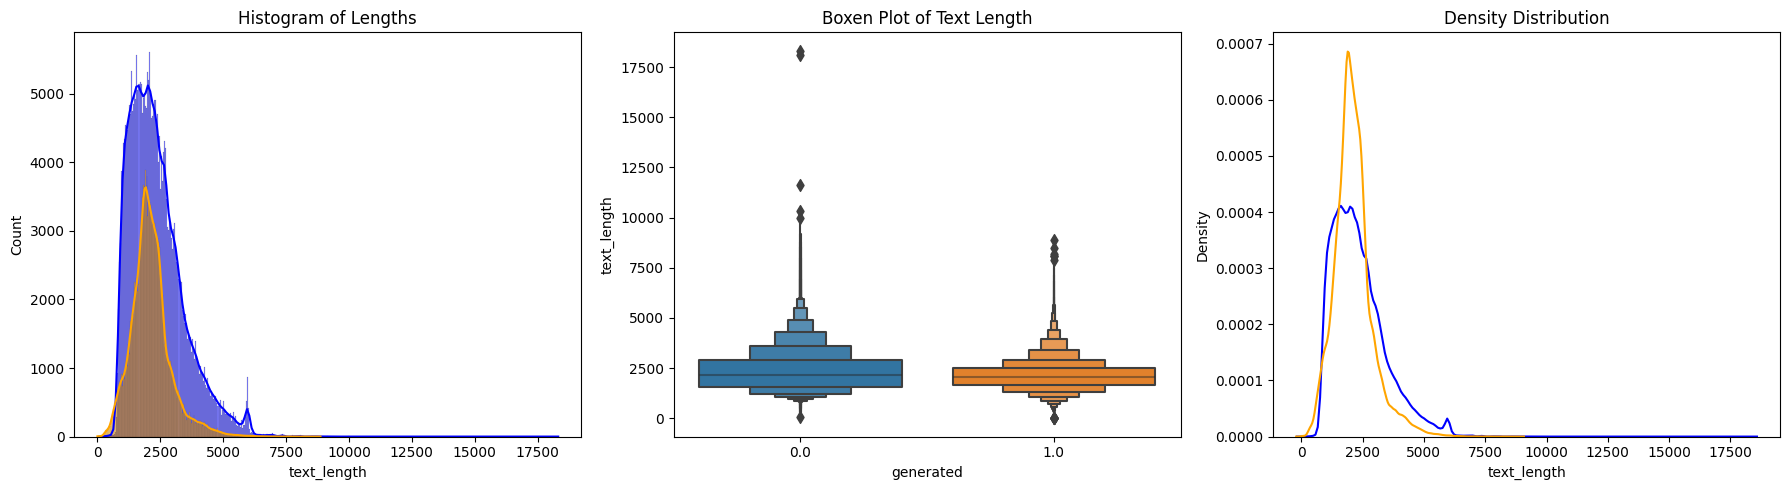

In [45]:
 visualizer = DataVisualizer(df, human_lengths, ai_lengths)
 visualizer.plot_distributions()

# Data Preprocessing 

In [46]:
# Function to clean text in the dataset
def clean_text(text):
    """
    Cleans the input text by performing several operations:
    - Convert to lowercase to maintain uniformity.
    - Remove punctuation to reduce noise.
    - Remove numbers as they may not contribute to text classification in this context.
    - Strip extra spaces for clean, standardized input.
    - Remove stopwords to focus on the meaningful words.
    
    Parameters:
    text (str): The input text to be cleaned.
    
    Returns:
    str: The cleaned text.
    """
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra spaces
    text = text.strip()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    text = ' '.join(filtered_tokens)
    return text

In [47]:
# Downsizing dataset for efficiency and manageability
# Split the dataset into a smaller subset and a discardable subset, stratifying by the label to maintain balance.
df_downsized, _ = train_test_split(df, test_size=0.1, stratify=df['generated'], random_state=42) #df_downsized has 10% of the original data, maintaining the original class distribution.

In [48]:
# Displaying downsized dataset
df_downsized

,text,generated,text_length
180559,Why you should not need to take one extracurri...,0.0,3903
112131,"Venus is very dangerous and volcanic, but this...",0.0,1994
84901,Reasons Why We Shouldn't Use This Technology!\...,0.0,1875
305298,There are pros AYD boys to both sending paper ...,1.0,1024
5340,"In Vauban, Germany, there are no cars. The onl...",0.0,1841
...,...,...,...
377586,Many people believe that the production of dri...,0.0,3179
112389,The Face on Mars is just a natural landform. I...,0.0,1343
345857,Studying Venus is a worthy pursuit despite the...,0.0,1728
61949,"Dear Principal,\n\nI feel that it would be wro...",0.0,924


In [49]:
# Cleaning the text column in the downsized dataframe
df_downsized['cleaned_text'] = df_downsized['text'].apply(clean_text)
df_downsized['cleaned_text'] = df_downsized['cleaned_text'].fillna("")  # Replacing NaN with empty strings

In [50]:
# Displaying downsized dataset with cleaned text
df_downsized

,text,generated,text_length,cleaned_text
180559,Why you should not need to take one extracurri...,0.0,3903,need take one extracurricular activity pass sc...
112131,"Venus is very dangerous and volcanic, but this...",0.0,1994,venus dangerous volcanic article opened eyes w...
84901,Reasons Why We Shouldn't Use This Technology!\...,0.0,1875,reasons shouldnt use technology idea read huma...
305298,There are pros AYD boys to both sending paper ...,1.0,1024,pros ayd boys sending paper ayd electronic car...
5340,"In Vauban, Germany, there are no cars. The onl...",0.0,1841,vauban germany cars way travel aside walking b...
...,...,...,...,...
377586,Many people believe that the production of dri...,0.0,3179,many people believe production driverless cars...
112389,The Face on Mars is just a natural landform. I...,0.0,1343,face mars natural landform think face evidence...
345857,Studying Venus is a worthy pursuit despite the...,0.0,1728,studying venus worthy pursuit despite dangers ...
61949,"Dear Principal,\n\nI feel that it would be wro...",0.0,924,dear principal feel would wrong passed policy ...


In [51]:
# Splitting dataset into training and validation sets
train_df, val_df = train_test_split(df_downsized, test_size=0.1)

In [52]:
# Saveing splited datasets to CSV for data generator usage (helps manage large data)
train_df.to_csv('/kaggle/working/train_dataset.csv', index=False)
val_df.to_csv('/kaggle/working/val_dataset.csv', index=False)

In [53]:
# Initializing the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [54]:
# Function to encode texts
def encode_texts(tokenizer, texts, max_length=128):
    """
    Encodes a list of texts into a format compatible with BERT inputs.
    
    Parameters:
    tokenizer: The tokenizer to use for encoding texts.
    texts (list of str): The texts to encode.
    max_length (int): The maximum length of the encoded sequences.
    
    Returns:
    dict: A dictionary with the encoded sequences, suitable for model input.
    """
    encoding = tokenizer(texts, truncation=True, padding='max_length', max_length=max_length, return_tensors='tf')
    return {key: val for key, val in encoding.items()}

# Data Loading and Batching/Chunking

In [55]:
# Generator function to load and preprocess the dataset in chunks to save computational time
def load_and_preprocess_data(filename, tokenizer, chunksize=32, max_length=256):
    """
    Generator function that loads and preprocesses data in chunks.
    This is useful for managing memory and processing large datasets.
    
    Parameters:
    filename (str): Path to the dataset file.
    tokenizer: The tokenizer used for encoding texts.
    chunksize (int): The size of chunks to read and process at a time.
    max_length (int): Maximum length of the text sequences after encoding.
    
    Yields:
    Input and target data in batches, suitable for model training or evaluation.
    """
    for chunk in pd.read_csv(filename, chunksize=chunksize):
        inputs = encode_texts(tokenizer, chunk['cleaned_text'].tolist(), max_length=max_length)
        targets = chunk['generated'].values
        yield inputs, {'output_1': targets} 

# Model Training

In [56]:
# Loading a pre-trained BERT model for sequence classification
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [57]:
# Compiling the model with Adam optimizer, loss function, and metrics
optimizer = Adam(learning_rate=5e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [58]:
# Setting up early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='min', restore_best_weights=True)

In [59]:
# Training and validation generators
train_gen = load_and_preprocess_data('/kaggle/working/train_dataset.csv', tokenizer)
val_gen = load_and_preprocess_data('/kaggle/working/val_dataset.csv', tokenizer)

In [60]:
# Recording the training time
# Recording the start time
start_time = time.time()

In [61]:
# Fiting the model with the data generator
model.fit(
    train_gen, 
    validation_data=val_gen, 
    epochs=10, 
    callbacks=[early_stopping, tensorboard_callback],  # TensorBoard callback to track progress
    steps_per_epoch=200, 
    validation_steps=50,
    verbose=1
)

Epoch 1/10


I0000 00:00:1707208512.219789     106 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


200/200 [==============================] - 281s 1s/step - loss: 0.1473 - accuracy: 0.9417 - val_loss: 0.0568 - val_accuracy: 0.9831
Epoch 2/10
200/200 [==============================] - 229s 1s/step - loss: 0.0526 - accuracy: 0.9811 - val_loss: 0.0450 - val_accuracy: 0.9862
Epoch 3/10
200/200 [==============================] - 230s 1s/step - loss: 0.0433 - accuracy: 0.9856 - val_loss: 0.0211 - val_accuracy: 0.9950
Epoch 4/10
200/200 [==============================] - 230s 1s/step - loss: 0.0404 - accuracy: 0.9897 - val_loss: 0.0317 - val_accuracy: 0.9906
Epoch 5/10
200/200 [==============================] - 229s 1s/step - loss: 0.0288 - accuracy: 0.9900 - val_loss: 0.0227 - val_accuracy: 0.9925
Epoch 6/10
200/200 [==============================] - 231s 1s/step - loss: 0.0252 - accuracy: 0.9917 - val_loss: 0.0226 - val_accuracy: 0.9944
Epoch 6: early stopping


In [62]:
# Recording the end time
end_time = time.time()

# Calculating and print the training duration
training_duration = end_time - start_time
print(f"Training completed in {training_duration} seconds")

Training completed in 1429.72260928154 seconds


# Evaluation and Prediction

In [64]:
# Function to make predictions with the trained model
def predict_example(text, tokenizer, model, max_length=128):
    """
    Makes a prediction on a single example text, printing the model's logits and returning the predicted class.
    
    Parameters:
    text (str): The input text to predict on.
    tokenizer: The tokenizer used for encoding the text.
    model: The trained BERT model.
    max_length (int): Maximum length of the text sequence after encoding.
    
    Returns:
    str: The predicted class label ('AI-generated' or 'Human-written').
    """
    inputs = encode_texts(tokenizer, [text], max_length=max_length)
    predictions = model.predict(inputs)
    # Print raw logits or probabilities
    print(predictions.logits)
    predicted_class = np.argmax(predictions.logits, axis=1)[0]
    return "AI-generated" if predicted_class == 1 else "Human-written"

In [68]:
# Making predictions

#Text1 from the Internet written by human retrieved from https://www.cbc.ca/news/canada/newfoundland-labrador/snow-wind-rain-feb-04-1.7104491
example_text_1 ="Most of the island is under a special weather statement with a prolonged period of snow in the forecast for much of western and central Newfoundland, along the northeast coast and onto the northern Avalon Peninsula."

#Text2 generated by ChatGPT:
example_text_2 = "Artificial intelligence is advancing rapidly, but human creativity and empathy remain unmatched in understanding complex emotions."

#Text3 generated by ChatGPT:
example_text_3 = "While AI excels in data analysis, human intuition and adaptability are crucial for navigating unpredictable situations."

#Text4 from the Internet written by human retrieved from https://michiganlawreview.org/journal/a-mystifying-and-distorting-factor-the-electoral-college-and-american-democracy/
example_text_4 ="As the 2020 presidential election made clear, the Electoral College is a profoundly dangerous institution. American constitutional democracy survived that election and its aftermath, emerging battered and bruised but still standing."


prediction_1 = predict_example(example_text_1, tokenizer, model)
prediction_2 = predict_example(example_text_2, tokenizer, model)
prediction_3 = predict_example(example_text_3, tokenizer, model)
prediction_4 = predict_example(example_text_4, tokenizer, model)

print(f"Example Text 1 Prediction: {prediction_1}")
print(f"Example Text 2 Prediction: {prediction_2}")
print(f"Example Text 3 Prediction: {prediction_3}")
print(f"Example Text 4 Prediction: {prediction_4}")

1/1 [==============================] - 0s 42ms/step
[[ 3.3856375 -3.1914299]]
1/1 [==============================] - 0s 41ms/step
[[-4.1333995  3.7492206]]
1/1 [==============================] - 0s 40ms/step
[[-4.128411  3.726496]]
1/1 [==============================] - 0s 40ms/step
[[ 3.2880478 -3.1625226]]
Example Text 1 Prediction: Human-written
Example Text 2 Prediction: AI-generated
Example Text 3 Prediction: AI-generated
Example Text 4 Prediction: Human-written


In [63]:
# Activating TensorBoard within the notebook to visualize training
%load_ext tensorboard
%reload_ext tensorboard
%tensorboard --logdir /kaggle/working/logs/fit